In [2]:
from ultralytics import YOLO
import os

# 1. Define Paths and Model
# Note: Since the notebook is likely running from your 'pothole' directory, 
# we can use the relative paths for the model and the YAML file.
MODEL_WEIGHTS = 'yolo11s.pt'
DATA_YAML = 'pothole.yaml'

# 2. Load the model
# The first time this runs, it will download yolo11s.pt if not already present.
model = YOLO(MODEL_WEIGHTS)

# 3. Start Training
results = model.train(
    data=DATA_YAML,
    epochs=50,
    imgsz=640,
    batch=16, # Adjust based on your GPU memory
    name='pothole_yolo_run_1' # Assign a unique name for your run
)

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\mohid\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.229  Python-3.10.19 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=pothole.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, io

In [4]:
# --------------------------------------------------------
# 🎯 FINAL MODEL EVALUATION ON THE UNSEEN TEST SET (101 Images)
# --------------------------------------------------------

from ultralytics import YOLO
import os

# Define Paths - Using the structure confirmed by your file system
RESULTS_DIR = 'runs/detect/pothole_yolo_run_1'
BEST_MODEL_PATH = os.path.join(RESULTS_DIR, 'weights', 'best.pt') # <--- This is the exact path
DATA_YAML = 'pothole.yaml'

print(f"Loading best model from: {BEST_MODEL_PATH}")

# 2. Load the best trained model weights
model = YOLO(BEST_MODEL_PATH)

# 3. Run Validation (Evaluation) on the 'test' split
metrics = model.val(
    data=DATA_YAML,
    split='test' 
)

# 4. Display the Final Metrics
print("\n--- ✅ TEST SET EVALUATION COMPLETE ---")
print(f"Final mAP50 (High Accuracy Check): {metrics.box.map50:.4f}")
print(f"Final mAP50-95 (General Accuracy Check): {metrics.box.map:.4f}")
print("---------------------------------------")

Loading best model from: runs/detect/pothole_yolo_run_1\weights\best.pt
Ultralytics 8.3.229  Python-3.10.19 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access  (ping: 0.20.1 ms, read: 86.451.2 MB/s, size: 647.4 KB)
val: Scanning C:\Users\mohid\Desktop\pothole\pothole_yolo\labels\test... 101 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 101/101 420.6it/s 0.2s1s
val: New cache created: C:\Users\mohid\Desktop\pothole\pothole_yolo\labels\test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 1.6it/s 4.3s0.3ss
                   all        101        308      0.816      0.646      0.761      0.487
Speed: 2.0ms preprocess, 8.9ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to C:\Users\mohid\Desktop\pothole\runs\detect\val2

--- ✅ TEST SET EVALUATION COMPLETE ---
Final mAP50 (High Accu

Loading model: runs/detect/pothole_yolo_run_1/weights/best.pt

--- ✅ PREDICTION COMPLETE ---


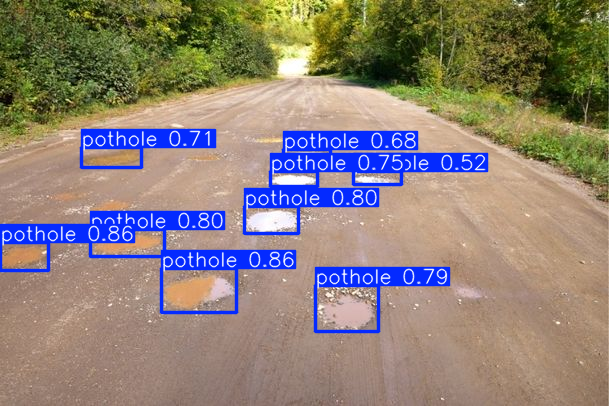

Detected 9 object(s) in the image.
-------------------------------


In [1]:
# --------------------------------------------------------
# 🖼️ RUN PREDICTION AND DISPLAY IN JUPYTER CELL
# --------------------------------------------------------

from ultralytics import YOLO
import os
from PIL import Image
from IPython.display import display # Import the display function

# 1. Define Paths and Settings
# Path to your best model weights
BEST_MODEL_PATH = 'runs/detect/pothole_yolo_run_1/weights/best.pt' 

# Path to the image you want to test (Ensure this path is correct)
TEST_IMAGE_PATH = 'C:/Users/mohid/Desktop/pot2.jpg' 

# Confidence threshold (0.5 is a good balance)
CONFIDENCE_THRESHOLD = 0.5 

# 2. Load the trained model
print(f"Loading model: {BEST_MODEL_PATH}")
model = YOLO(BEST_MODEL_PATH)

# 3. Run prediction
# NOTE: save=False is used to prevent writing the image to disk
results = model.predict(
    source=TEST_IMAGE_PATH,
    conf=CONFIDENCE_THRESHOLD,
    save=False, # <-- DO NOT SAVE TO DISK
    exist_ok=True,
    verbose=False # Keep terminal output clean
)

# 4. Process and Display the Results
print("\n--- ✅ PREDICTION COMPLETE ---")

# The 'results' is a list (one item for one image). We get the first item.
result = results[0]

# result.plot() returns a BGR NumPy array (image with boxes drawn)
im_array = result.plot()

# Convert the NumPy array from BGR (OpenCV format) to RGB
# and then create a PIL Image object
im = Image.fromarray(im_array[..., ::-1]) 

# Display the image directly in the Jupyter Notebook cell
display(im)

print(f"Detected {len(result.boxes)} object(s) in the image.")
print("-------------------------------")

Loading model: runs/detect/pothole_yolo_run_1/weights/best.pt

Running prediction on 10 random test images...

--- ✅ PREDICTION RESULTS ---


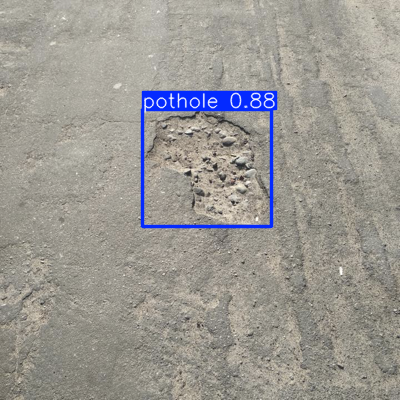

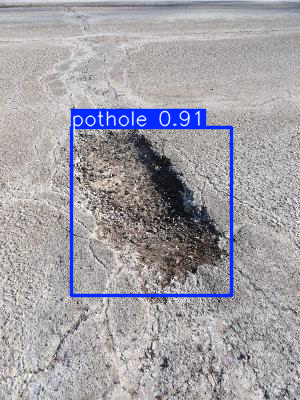

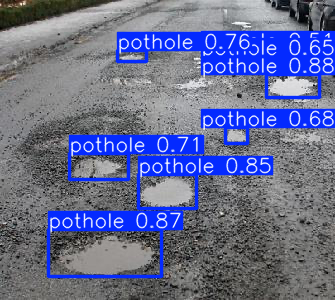

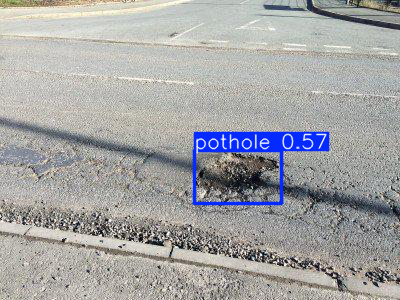

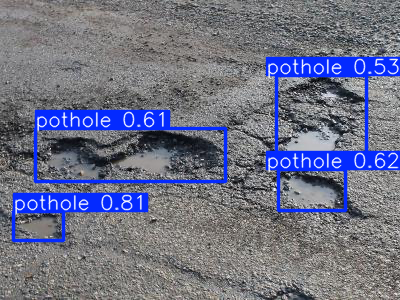

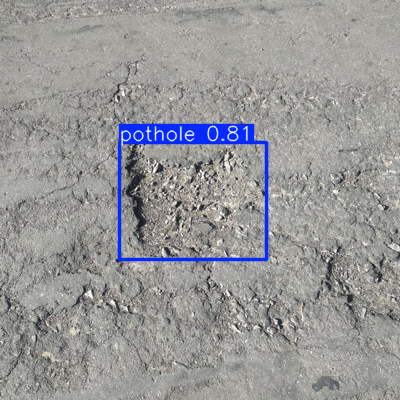

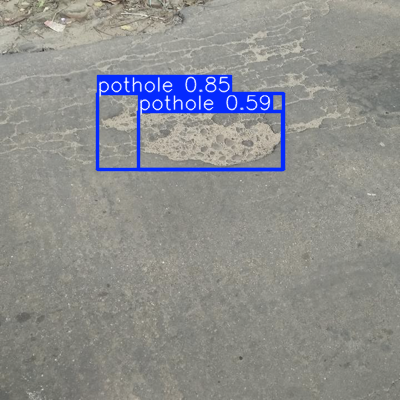

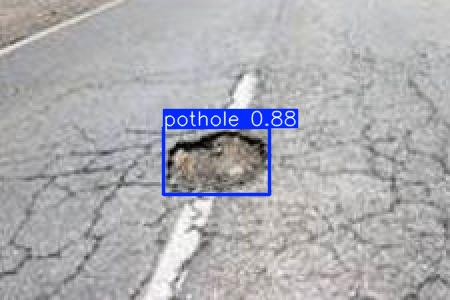

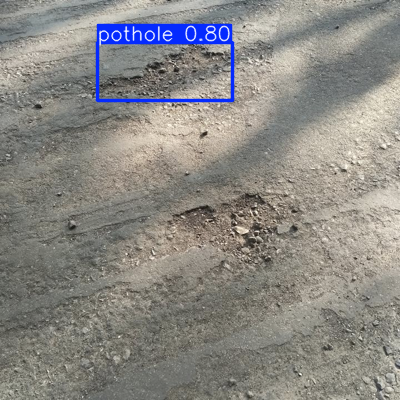

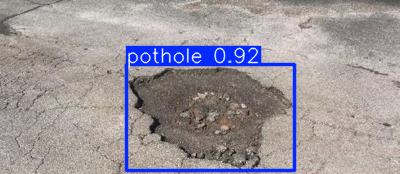

-------------------------------


In [2]:
# --------------------------------------------------------
# 🖼️ RANDOM 10 IMAGE PREDICTION FROM TEST SET
# --------------------------------------------------------

from ultralytics import YOLO
import os
import random
from PIL import Image
from IPython.display import display, HTML # Import HTML for formatting

# 1. Define Paths and Settings
# Path to your best model weights
BEST_MODEL_PATH = 'runs/detect/pothole_yolo_run_1/weights/best.pt' 

# Path to your Test Image Directory
TEST_DIR = 'pothole_yolo/images/test' # <--- Assuming this is the correct relative path

# Confidence threshold
CONFIDENCE_THRESHOLD = 0.5 
NUM_IMAGES_TO_SAMPLE = 10

# 2. Load the trained model
print(f"Loading model: {BEST_MODEL_PATH}")
model = YOLO(BEST_MODEL_PATH)

# --- 3. Randomly Select 10 Images ---
try:
    # Get a list of all files in the directory
    all_files = os.listdir(TEST_DIR)
    
    # Filter for common image extensions (case-insensitive)
    image_extensions = ('.jpg', '.jpeg', '.png', '.webp', '.bmp')
    image_files = [f for f in all_files if f.lower().endswith(image_extensions)]
    
    if len(image_files) < NUM_IMAGES_TO_SAMPLE:
        print(f"⚠️ Warning: Found only {len(image_files)} images. Using all found images.")
        sampled_files = image_files
    else:
        # Use random.sample() to pick 10 unique files
        sampled_files = random.sample(image_files, NUM_IMAGES_TO_SAMPLE)
        
    # Create the full list of paths to pass to the model
    source_paths = [os.path.join(TEST_DIR, f) for f in sampled_files]

except FileNotFoundError:
    print(f"❌ ERROR: Test directory not found! Check your path: {TEST_DIR}")
    source_paths = []
    
# --- 4. Run Prediction on the list of paths ---
if source_paths:
    print(f"\nRunning prediction on {len(source_paths)} random test images...")
    
    # Ultralytics model.predict() can accept a list of sources!
    results = model.predict(
        source=source_paths,
        conf=CONFIDENCE_THRESHOLD,
        save=False, # Do not save to disk
        verbose=False # Keep terminal output clean
    )

    # --- 5. Display Results in the Jupyter Cell ---
    print("\n--- ✅ PREDICTION RESULTS ---")
    
    for i, result in enumerate(results):
        # 5a. Plot the bounding boxes onto the image
        im_array = result.plot()
        
        # 5b. Convert from BGR (OpenCV) to RGB (PIL) for correct color display
        im = Image.fromarray(im_array[..., ::-1]) 
        
        # 5c. Create a header with detection count
        num_detections = len(result.boxes)
        file_name = sampled_files[i]
        
        display(HTML(f"<h3>Image {i+1}: {file_name} ({num_detections} pothole(s) detected)</h3>"))
        
        # 5d. Display the image
        display(im)
        
    print("-------------------------------")